In [8]:
# Problem 1
#1 Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
try:
    data = pd.read_csv('diabetes.csv')
except Exception as e:
    from google.colab import files
    print('diabetes.csv not found. Please upload the file when prompted.')
    uploaded = files.upload()
    fname = list(uploaded.keys())[0]
    data = pd.read_csv(fname)

# ensure no NA rows
data = data.dropna()
print('Loaded dataset shape:', data.shape)
print(data.head())


diabetes.csv not found. Please upload the file when prompted.


Saving diabetes_.csv to diabetes_ (1).csv
Loaded dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Problem 1
#2 Feature engineering + split
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values
y = y.astype(int)
def train_test_split_scratch(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    ts = int(len(X) * test_size)
    return X[idx[ts:]], X[idx[:ts]], y[idx[ts:]], y[idx[:ts]]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


Train shape: (538, 8) Test shape: (230, 8)


In [ ]:
# Problem 1
#3 KNN implementation and accuracy
def euclidean_distance(a, b):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict_single(q, X, y, k=3):
    d = [euclidean_distance(q, x) for x in X]
    i = np.argsort(d)[:k]
    labels = np.asarray(y)[i].astype(int)
    # ensure labels are non-negative integers for bincount
    labels = labels - labels.min()
    return np.bincount(labels).argmax()

def knn_predict(Xt, X, y, k=3):
    return np.array([knn_predict_single(x, X, y, k) for x in Xt])

def compute_accuracy(t, p):
    return (np.sum(t == p) / len(t)) * 100

pred1 = knn_predict(X_test, X_train, y_train, k=3)
acc1 = compute_accuracy(y_test, pred1)
print('Accuracy (original):', acc1)


Accuracy (original): 60.86956521739131


In [ ]:
# Problem 2
#1 Scale features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
# avoid division by zero
X_std[X_std == 0] = 1.0
X_scaled = (X - X_mean) / X_std

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
acc_scaled = compute_accuracy(y_test_s, pred_scaled)
print('Accuracy (scaled):', acc_scaled)


Accuracy (scaled): 69.56521739130434


In [ ]:
# Problem 2
#2 Compare results
print('Original Accuracy:', acc1)
print('Scaled Accuracy:', acc_scaled)


Original Accuracy: 60.86956521739131
Scaled Accuracy: 69.56521739130434


In [7]:
# Problem 3
#1 Run k=1..15 for both datasets (measure time and accuracy)
kvals = list(range(1, 16))
acc_o = []
acc_s = []
time_o = []
time_s = []

for k in kvals:
    start = time.time()
    po = knn_predict(X_test, X_train, y_train, k)
    time_o.append(time.time() - start)
    acc_o.append(compute_accuracy(y_test, po))

    start = time.time()
    ps = knn_predict(X_test_s, X_train_s, y_train_s, k)
    time_s.append(time.time() - start)
    acc_s.append(compute_accuracy(y_test_s, ps))

print('Done running k values')


Done running k values


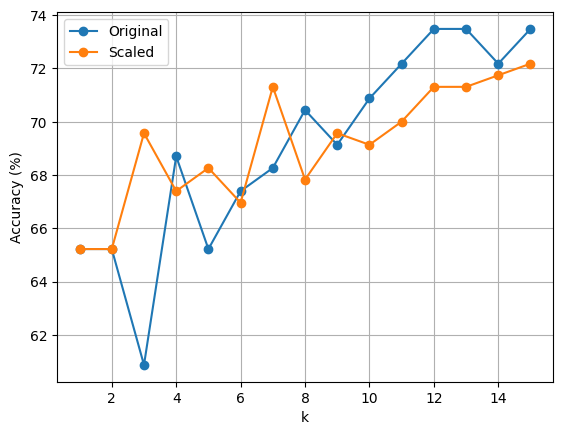

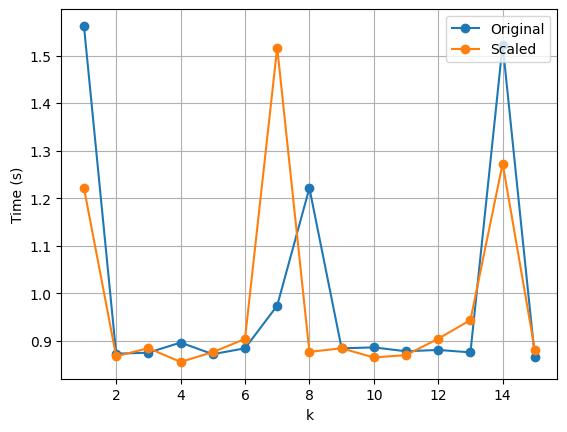

In [9]:
# Problem 3
#2 Plot accuracy + time
plt.plot(kvals, acc_o, marker='o', label='Original')
plt.plot(kvals, acc_s, marker='o', label='Scaled')
plt.legend(); plt.xlabel('k'); plt.ylabel('Accuracy (%)'); plt.grid(); plt.show()

plt.plot(kvals, time_o, marker='o', label='Original')
plt.plot(kvals, time_s, marker='o', label='Scaled')
plt.legend(); plt.xlabel('k'); plt.ylabel('Time (s)'); plt.grid(); plt.show()


In [10]:
# Problem 3
#3 Identify optimal k
best_o = kvals[int(np.argmax(acc_o))]
best_s = kvals[int(np.argmax(acc_s))]
print('Best Original Accuracy:', max(acc_o), 'at k =', best_o)
print('Best Scaled Accuracy:', max(acc_s), 'at k =', best_s)


Best Original Accuracy: 73.47826086956522 at k = 12
Best Scaled Accuracy: 72.17391304347827 at k = 15
